<a href="https://colab.research.google.com/github/AnastasiiaLavre/AI4Gov2023/blob/main/1_Optical_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. In this notebook we prepare PDF files for future steps. We tried different OCR techniques to see which one is better fit for this dataset.


Option 1. OCR with ocrmypdf

In [1]:
#Import libraries including OCR
! apt install tesseract-ocr
! apt install libtesseract-dev
!pip install pytesseract
!apt install ghostscript
!pip install ocrmypdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,029 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
from ctypes.util import find_library
find_library("gs")

'libgs.so.9'

In [3]:
import pandas as pd
%load_ext google.colab.data_table

In [4]:
#mount google drive to access all the documents
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#list the files to be OCR'ed
import os
file_list = []

input_folder_path = "/content/drive/MyDrive/Stanford/Input" #folder with inital scans
output_folder_path = "/content/drive/MyDrive/Stanford/Output" #OCR'ed files

for filename in os.listdir(input_folder_path):
    if filename.startswith("40001521.003"): #normally it should take all pdfs, however, in this iteration I took the newly added files only
    #filename.endswith("pdf"):
      file_list.append(filename)

print("The following files will be converted : ")
pd.DataFrame(file_list, columns=["Filename"])

The following files will be converted : 


,Filename
0,40001521.003 0436 - 0535.pdf
1,40001521.003 0335 - 0435.pdf
2,40001521.003 0636 - 0668.pdf
3,40001521.003 0536 - 0635.pdf


In [7]:
!sudo apt update

!sudo apt install tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [498 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [993 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [966 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,235 kB]
Hit:13 https://ppa.

In [8]:
#Converting PDF to OCR
for filename in file_list:
#  print("Converting : " + filename)
  input_filename = input_folder_path+'/'+filename
  output_filename = output_folder_path+'/'+filename
  !ocrmypdf --force-ocr "{input_filename}" "{output_filename}"

Scanning contents     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 100/100 0:00:00
Start processing 2 pages concurrently                               ]8;id=34874;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_sync.py\_sync.py]8;;\:]8;id=387165;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_sync.py#259\259]8;;\
   18  lots of diacritics - possibly poor OCR                   ]8;id=142808;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py\tesseract.py]8;;\:]8;id=955402;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py#259\259]8;;\
   24  lots of diacritics - possibly poor OCR                   ]8;id=203070;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py\tesseract.py]8;;\:]8;id=460711;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py#259\259]8;;\
   38  lots of diacritics - possibly poor OCR                   ]8;id=938020;file:///usr/local/lib/pyt

In [ ]:
import os
input_folder_path = "/content/drive/MyDrive/Stanford/Input"
output_folder_path = "/content/drive/MyDrive/Stanford/Output"
for filename in os.listdir(input_folder_path):
    if filename.startswith("40001521.002") and filename.endswith(".pdf"):
        input_filename = os.path.join(input_folder_path, filename)
        output_filename = os.path.join(output_folder_path, filename)
        command = f'ocrmypdf --force-ocr "{input_filename}" "{output_filename}"'
        os.system(command)

Option 2. PDF to Image to Text

In [9]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [10]:
!pip install opencv-python
!pip install pdf2image
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00


In [11]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (315 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122184 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


In [12]:
import cv2
import pytesseract
import os
import numpy as np
import pandas as pd
import re
from pdf2image import convert_from_bytes

In [14]:
file="/content/drive/MyDrive/Stanford/Output_Split/40001521.003 0335 - 0668_3.pdf"

In [15]:
# Some help functions
def get_conf(page_gray):
    '''return a average confidence value of OCR result '''
    df = pytesseract.image_to_data(page_gray,output_type='data.frame')
    df.drop(df[df.conf==-1].index.values,inplace=True)
    df.reset_index()
    return df.conf.mean()

def deskew(image):
    '''deskew the image'''
    gray = cv2.bitwise_not(image)
    temp_arr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(temp_arr > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

pdf_file = convert_from_bytes(open(file, 'rb').read())

In [16]:
# Initialize an empty DataFrame
pages_df = pd.DataFrame(columns=['conf', 'text'])

for (i, page) in enumerate(pdf_file):
    try:
        # Transfer image of pdf_file into array
        page_arr = np.asarray(page)
        # Transfer into grayscale
        page_arr_gray = cv2.cvtColor(page_arr, cv2.COLOR_BGR2GRAY)
        # Deskew the page
        page_deskew = deskew(page_arr_gray)
        # Calculate confidence value
        page_conf = get_conf(page_deskew)
        # Extract text
        page_text = pytesseract.image_to_string(page_deskew, output_type=pytesseract.Output.DICT)
        # Append to the DataFrame
        new_row = {'conf': page_conf, 'text': page_text['text']}
        pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
    except:
        # If can't extract, add a row with -1 confidence and 'N/A' text
        new_row = {'conf': -1, 'text': 'N/A'}
        pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
        continue

# Now you have a DataFrame containing confidence values and text extracted from the PDF pages


In [17]:
pages_df

,conf,text
0,94.217500,\n\nTwenty-fourth meetin:\n5-6 July 1984\n\nS...
1,94.760599,"- sateguaras. sareguard action, whether taken ..."
2,95.437500,CG. 18/W/83\nPage 3\n\nindustries. Adjustment ...
3,91.895062,"COLLIE. hele Way e494"" YS SS MESS KN ONES ESS ..."
4,95.222222,vi)\n\nCG.18/W/83\nPage 5\n\nTo what extent wo...
5,90.691275,OLAULLURAL AUVIUOLMEN ANY LRAME PULA e Vs JIU9...
6,94.631068,had happened had varied from sector to sector....


In [20]:
import os
import pandas as pd
import numpy as np
import cv2
import pytesseract
from pdf2image import convert_from_bytes

OCR_dic = {}
PATH = "/content/drive/MyDrive/Stanford/PDF 1 page"

# List all PDF files in the input directory
file_list = [f for f in os.listdir(PATH) if f.startswith('40001521.003 0335 - 0668') and f.endswith('.pdf')] #criteria which files to process
for file in file_list:
    # Convert PDF into images
    pdf_file = convert_from_bytes(open(os.path.join(PATH, file), 'rb').read())

    # Create a DataFrame to save each PDF's text
    pages_df = pd.DataFrame(columns=['conf', 'text'])
    for (i, page) in enumerate(pdf_file):
        try:
            # Transfer image of pdf_file into array
            page_arr = np.asarray(page)
            # Transfer into grayscale
            page_arr_gray = cv2.cvtColor(page_arr, cv2.COLOR_BGR2GRAY)
            # Deskew the page
            page_deskew = deskew(page_arr_gray)
            # Calculate confidence value
            page_conf = get_conf(page_deskew)
            # Extract string
            new_row = {'conf': page_conf, 'text': pytesseract.image_to_string(page_deskew)}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
        except:
            # If can't extract, add some notes into df
            new_row = {'conf': -1, 'text': 'N/A'}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
            continue

    # Save DataFrame into a dict with the filename as the key
    OCR_dic[file] = pages_df

In [21]:
OCR_dic[file_list[0]]

,conf,text
0,92.477509,ace\n\n \n\n‘ EMBARGO: NOT FOR PUBLICATION GAT...


In [22]:
page_text

{'text': "had happened had varied from sector to sector. lLNUS, White CUS seSsowe\nliberalization had taken place in some industrial areas, less had taken\nplace in other sectors including agriculture. The Working Party also\nbelieved that the GATT contributes to adjustment to the extent that it has\nsucceeded in promoting a stable and predictable trading system and\ndiscouraging the use of trade measures that can impede adjustment.\n\n7. The Working Party considered that the main contribution that the\nCONTRACTING PARTIES could make to the adjustment process would be to abide\nby their obligations under the GATT, to ensure strict adherence to\n\nCATT rules and to support and improve the GATT trading system, so as to\nfurther the fulfilment of the objectives of the GATT, including those in\nPart IV. By so doing, the GATT would also contribute towards the creation\nof an improved macro-economic environment for the adjustment process.\nStress was placed on GATT's work in regard to furthe

In [23]:
from PIL import Image

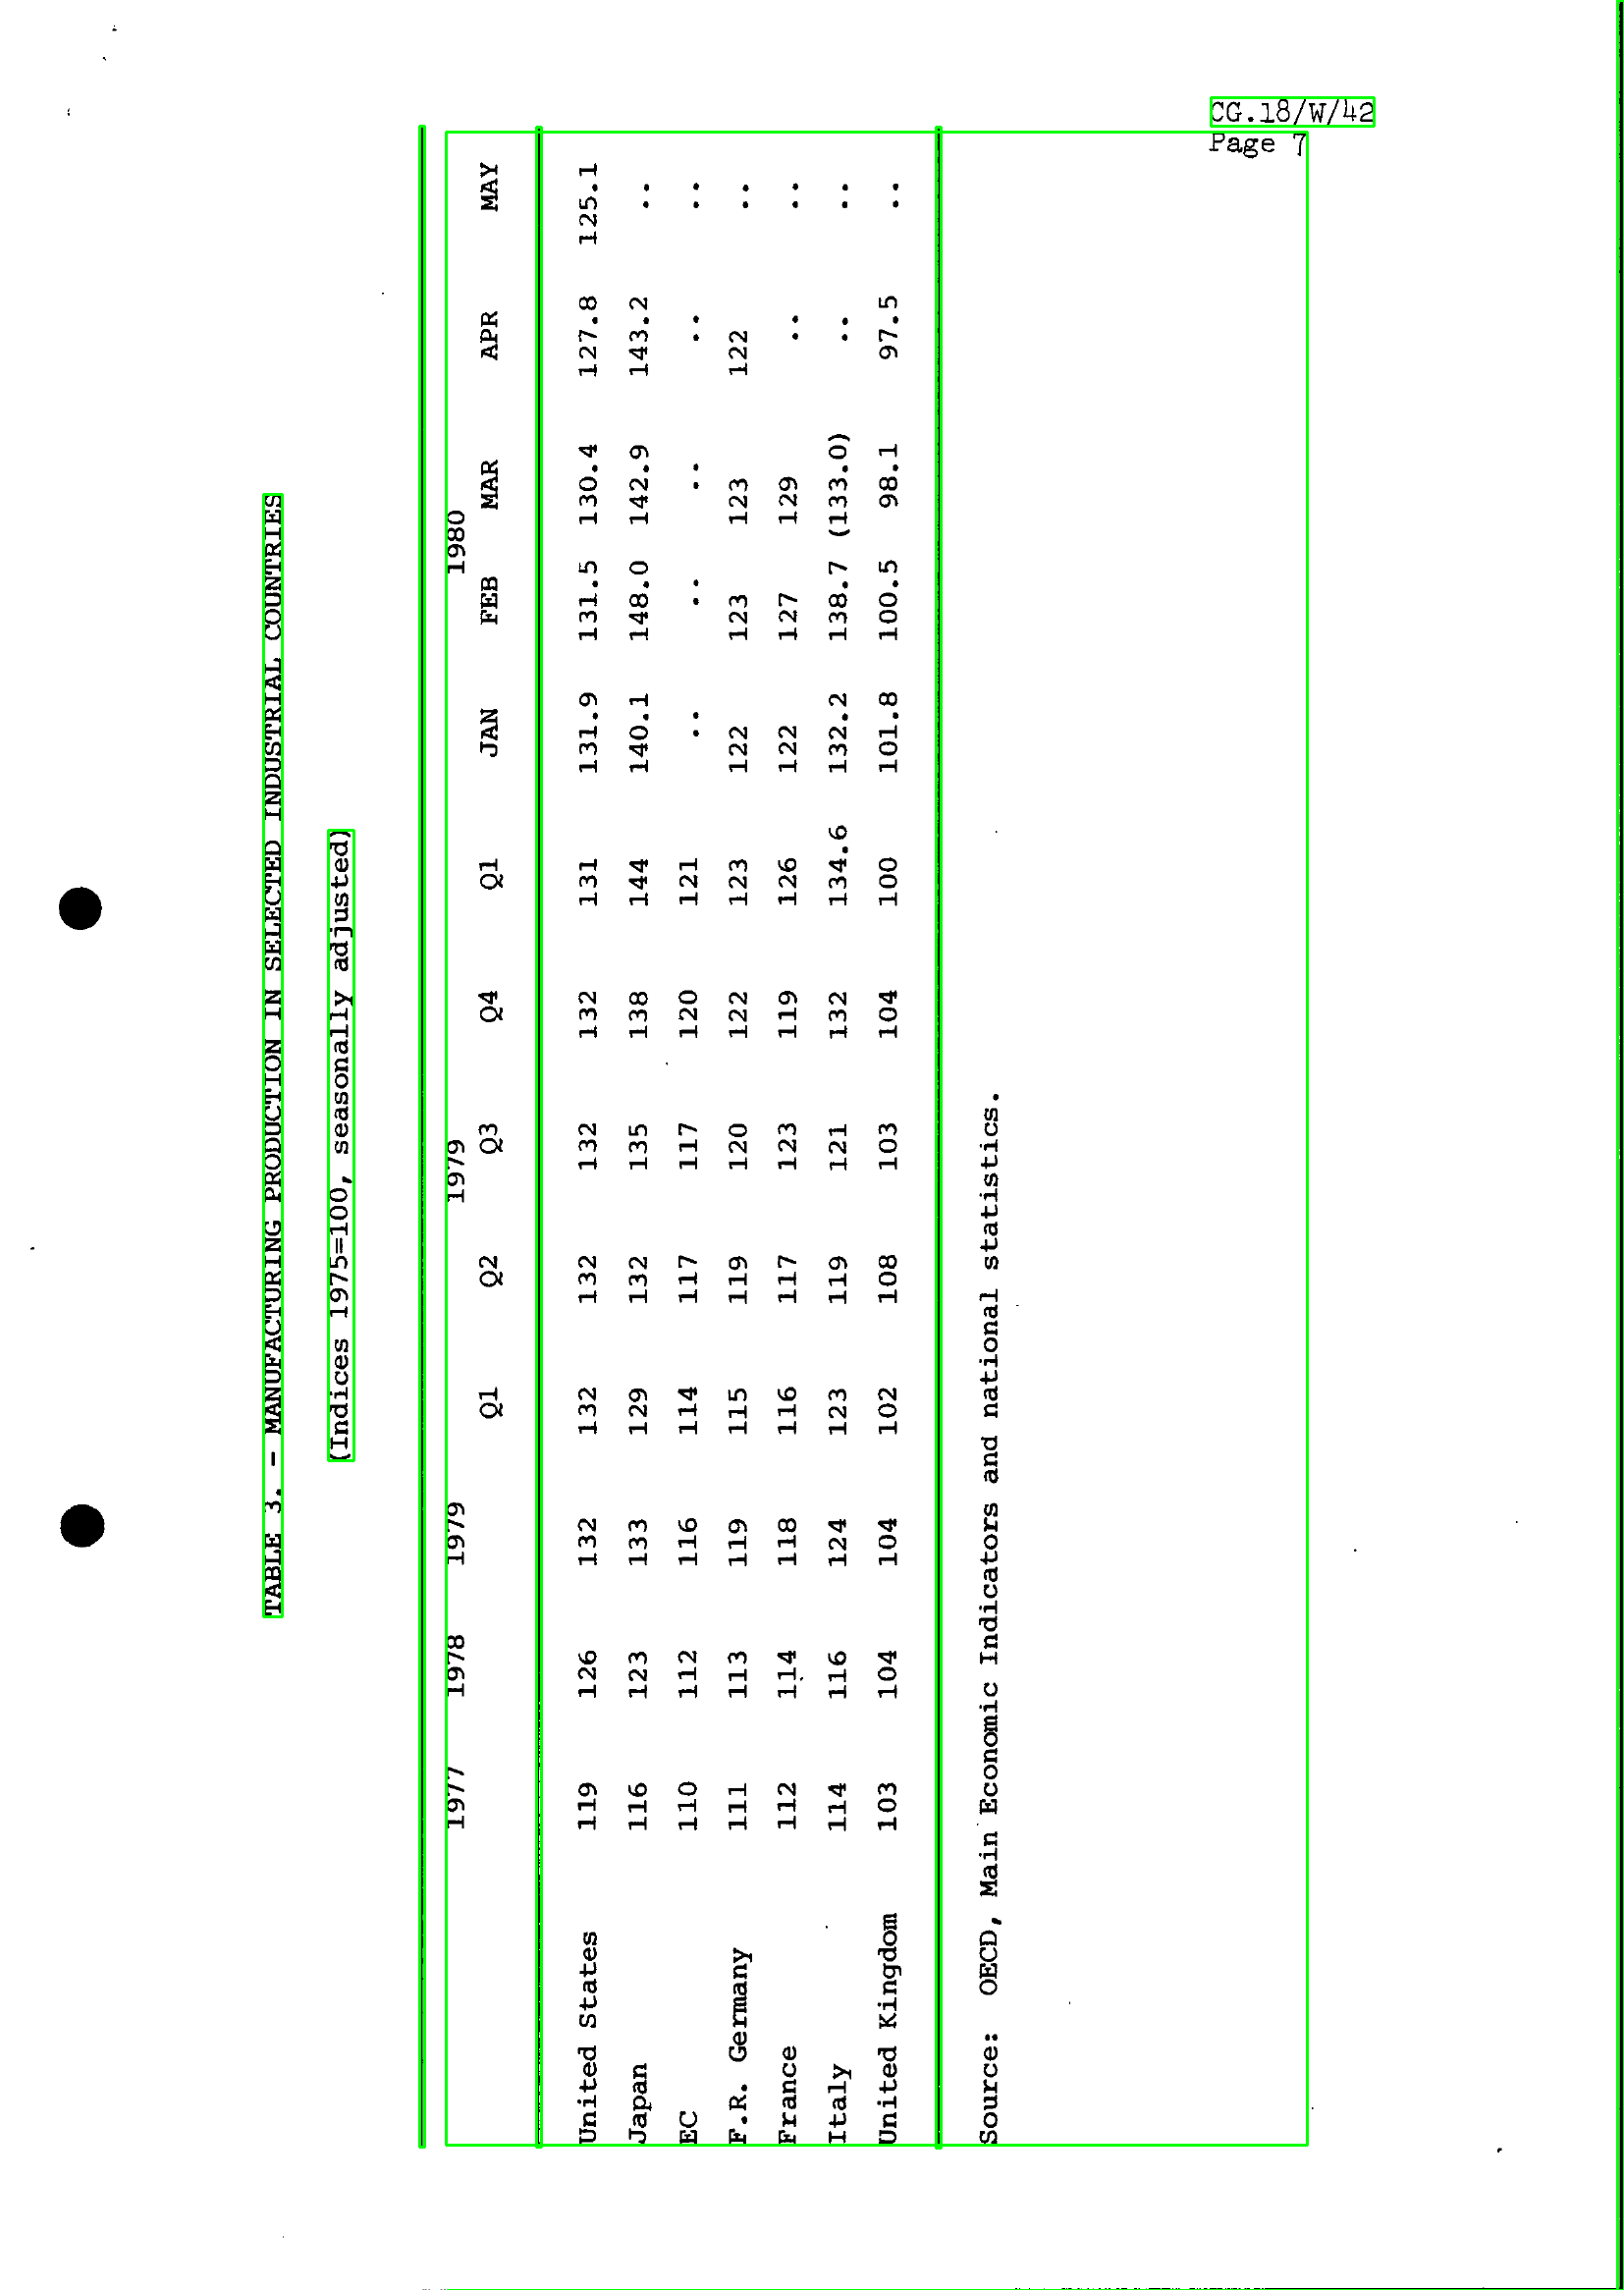

In [24]:
page_arr = np.asarray(pdf_file[0])

page_arr_gray = cv2.cvtColor(page_arr,cv2.COLOR_BGR2GRAY)

d = pytesseract.image_to_data(page_arr_gray,output_type=pytesseract.Output.DICT)

d_df = pd.DataFrame.from_dict(d)

n_boxes = len(d['text'])

for i in range(n_boxes):
    # level ==2 : show all the blocks recognized by tesseract
    if d['level'][i] ==2:

        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # draw green lines on boxes
        img = cv2.rectangle(page_arr, (x, y), (x + w, y + h), (0, 255, 0), 2)

Image.fromarray(img)

In [25]:
# Choose the index of the page you want to process
page_index = 0

page_arr = np.asarray(pdf_file[page_index])
page_arr_gray = cv2.cvtColor(page_arr, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(page_arr_gray, output_type=pytesseract.Output.DICT)
d_df = pd.DataFrame.from_dict(d)
n_boxes = len(d['text'])

for i in range(n_boxes):
    if d['level'][i] == 2:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(page_arr, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Get the base filename from the original PDF file
original_filename = file  # Replace with the actual filename
base_filename = os.path.splitext(os.path.basename(original_filename))[0]

# Construct the output path with the same name as the original file
output_path = f'/content/{base_filename}.png'
cv2.imwrite(output_path, img)

# Display the image (optional)
Image.fromarray(img).show()

In [26]:
import os
import pandas as pd
import numpy as np
import cv2
import pytesseract
from pdf2image import convert_from_bytes

OCR_dic = {}
PATH = "/content/drive/MyDrive/Stanford/PDF 1 page"

# List all PDF files in the input directory
file_list = [f for f in os.listdir(PATH) if f.startswith('40001521.003 0335 - 0668') and f.endswith('.pdf')]
for file in file_list:
    # Convert PDF into images
    pdf_file = convert_from_bytes(open(os.path.join(PATH, file), 'rb').read())

    # Create a DataFrame to save each PDF's text
    pages_df = pd.DataFrame(columns=['conf', 'text'])
    for (i, page) in enumerate(pdf_file):
        try:
            # Transfer image of pdf_file into array
            page_arr = np.asarray(page)
            # Transfer into grayscale
            page_arr_gray = cv2.cvtColor(page_arr, cv2.COLOR_BGR2GRAY)
            # Deskew the page
            page_deskew = deskew(page_arr_gray)
            # Calculate confidence value
            page_conf = get_conf(page_deskew)
            # Extract string
            new_row = {'conf': page_conf, 'text': pytesseract.image_to_string(page_deskew)}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
        except:
            # If can't extract, add some notes into df
            new_row = {'conf': -1, 'text': 'N/A'}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
            continue

    # Save DataFrame into a dict with the filename as the key
    OCR_dic[file] = pages_df


In [27]:
#Script for all PDFs in the directory
# Define a dictionary to store results for each file
OCR_dic = {}

PATH = "/content/drive/MyDrive/Stanford/PDF 1 page"

# List all PDF files in the input directory
file_list = [f for f in os.listdir(PATH) if f.startswith('40001521.003 0335 - 0668') and f.endswith('.pdf')]
for file in file_list:
    # Convert PDF into images
    pdf_file = convert_from_bytes(open(os.path.join(PATH, file), 'rb').read())

    # Create a DataFrame to save each PDF's text
    pages_df = pd.DataFrame(columns=['name', 'conf', 'text'])  # Added 'name' column
    for (i, page) in enumerate(pdf_file):
        try:
            # Transfer image of pdf_file into array
            page_arr = np.asarray(page)
            # Transfer into grayscale
            page_arr_gray = cv2.cvtColor(page_arr, cv2.COLOR_BGR2GRAY)
            # Deskew the page
            page_deskew = deskew(page_arr_gray)
            # Calculate confidence value
            page_conf = get_conf(page_deskew)
            # Extract string
            new_row = {'name': file, 'conf': page_conf, 'text': pytesseract.image_to_string(page_deskew)}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
        except:
            # If can't extract, add some notes into df
            new_row = {'name': file, 'conf': -1, 'text': 'N/A'}
            pages_df = pd.concat([pages_df, pd.DataFrame([new_row])], ignore_index=True)
            continue

    # Save DataFrame into a dictionary with the filename as the key
    OCR_dic[file] = pages_df

    # Print results for each file on the screen
    print(f'Results for {file}:')
    print(pages_df)
    print('\n')

# Combine all DataFrames in the dictionary into one DataFrame
combined_results_df = pd.concat(OCR_dic.values(), ignore_index=True)

# Print the combined results on the screen
print('Combined Results:')
print(combined_results_df)

# Save the combined results as a CSV file
combined_results_csv = os.path.join(PATH, 'combined_results.csv')
combined_results_df.to_csv(combined_results_csv, index=False)
print(f'Combined results saved as {combined_results_csv}')


Results for 40001521.003 0335 - 0668_31.pdf:
                              name       conf  \
0  40001521.003 0335 - 0668_31.pdf  92.477509   

                                                text  
0  ace\n\n \n\n‘ EMBARGO: NOT FOR PUBLICATION GAT...  


Results for 40001521.003 0335 - 0668_30.pdf:
                              name       conf  \
0  40001521.003 0335 - 0668_30.pdf  90.324324   

                                                text  
0  THE CURRENT ECONOMIC SITUATION AND ITS\nIMPLIC...  


Results for 40001521.003 0335 - 0668_28.pdf:
                              name       conf  \
0  40001521.003 0335 - 0668_28.pdf  90.321696   

                                                text  
0   \n\nConsultative Group of Eighteen\n\n \n\nFo...  


Results for 40001521.003 0335 - 0668_27.pdf:
                              name       conf  \
0  40001521.003 0335 - 0668_27.pdf  92.013514   

                                                text  
0  RESTRICTED\n\nGENERAL AGREEMEN

Option 3. OCR PDFs with Apache Tika

In [28]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=5a9116bda823188a27586908ddf63f60b6ac669569e41120737ff3eab7010399
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [29]:
# Install Java
!apt-get install -y openjdk-8-jre-headless

# Set JAVA_HOME environment variable
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'

# Install Apache Tika Python library
!pip install tika

# Import necessary modules
from tika import parser
from tika import detector

# Test Apache Tika
try:
    parsed = parser.from_buffer("Test Apache Tika.")
    detected_type = detector.from_buffer("Test Apache Tika.")
    print("Detected MIME type:", detected_type)
    print("Extracted text:", parsed['content'])
except Exception as e:
    print("An error occurred while testing Apache Tika:", str(e))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6
Suggested packages:
  libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 28 not upgraded.
Need to get 30.8 MB of archives.
After this operation, 104 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jre-headless amd64 8u382-ga-1~22.04.1 [30.8 MB]
Fetched 30.8 MB in 1s (56.6 MB/s)
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 122214 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_

2023-09-14 11:19:10,885 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-09-14 11:19:11,150 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-09-14 11:19:11,458 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


Detected MIME type: text/plain
Extracted text: 








Test Apache Tika.



In [30]:
import os
import csv
from tika import parser

# Define input and output directories
pdf_directory = "/content/drive/MyDrive/Stanford/PDF 1 page"
output_directory = "/content/drive/MyDrive/Stanford/Apache Tika TEXT 1 page"
combined_csv_file = "/content/drive/MyDrive/Stanford/Apache Tika TEXT 1 page/apache_tika_combined.csv"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a CSV file for storing results
csv_headers = ["PDF File", "Text Content"]
with open(combined_csv_file, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(csv_headers)

# Process each PDF file in the input directory
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        pdf_file_path = os.path.join(pdf_directory, pdf_file)

        # Extract text from the PDF using Apache Tika
        parsed_pdf = parser.from_file(pdf_file_path)
        text_content = parsed_pdf.get("content", "")

        # Check if the text content is None and replace it with an empty string
        if text_content is None:
            text_content = ""

        # Save the extracted text to a text file in the output directory
        text_file_path = os.path.join(output_directory, f"{pdf_file[:-4]}.txt")
        with open(text_file_path, "w", encoding="utf-8") as text_file:
            text_file.write(text_content)

        # Append the PDF file name and text content to the CSV file
        with open(combined_csv_file, "a", newline="", encoding="utf-8") as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow([pdf_file, text_content])

print("PDF processing and CSV creation completed.")

PDF processing and CSV creation completed.
